In [2]:
from pyspark.sql import SparkSession

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("seaborn")
sc.install_pypi_package("tabulate")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/25/47/22fc373440e144e2111363adaa07abb09ec1f03fbc071b6d9fc0bbf65f68/pandas-1.1.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/bc/45/5118a05b0d61173e6eb12bc5804f0fbb6f196adb0a20e0b16efc2b8e98be/seaborn-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/f9/f7a7e5009711579c72da2725174825e5056741bf4001815d097eef1b2e17/scipy-1.5.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/87/a6/8d7d06f6b69236a3c1818157875ceb1259ba0d9df4194f4fe138ffdc0f41/matplotlib-3.3.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
  Using cach

In [4]:
import numpy as np
import pyspark.sql.functions as F
from pyspark.sql.types import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
in_bucket = "s3://tfmbigdata/Files_Segunda_Entrega/stores.json"
stores = spark.read.format("json").load(in_bucket)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
stores.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+----------+-------+
|                city|isocountrycode| startdate|storeid|
+--------------------+--------------+----------+-------+
|Jerez de la Frontera|            ES|      null| ES7013|
|             Córdoba|            ES|      null| ES7012|
|             Córdoba|            ES|      null| ES7011|
|Mairena del Aljarafe|            ES|      null| ES7010|
|             Sevilla|            ES|      null| ES7009|
|               Zafra|            ES|      null| ES7008|
|             Sevilla|            ES|      null| ES7007|
|El Puerto de Sant...|            ES|      null| ES7006|
|        Dos Hermanas|            ES|      null| ES7005|
|               Écija|            ES|      null| ES7004|
|        Dos Hermanas|            ES|      null| ES7003|
|Jerez de la Frontera|            ES|2019-06-27| ES7002|
|         Puerto Real|            ES|2018-10-08| ES7001|
|            Albolote|            ES|      null| ES6034|
|             Granada|         

In [7]:
rows_count = stores.count()
columns = len(stores.columns)

print("Rows: ",rows_count,"\nColumns: ", columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rows:  1127 
Columns:  4

In [7]:
stores.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------+--------------+----------+-------+
|summary|    city|isocountrycode| startdate|storeid|
+-------+--------+--------------+----------+-------+
|  count|    1127|          1127|       560|   1127|
|   mean|    null|          null|      null|   null|
| stddev|    null|          null|      null|   null|
|    min|A Coruña|            ES|2015-12-17| ES0010|
|    max|   Úbeda|            ES|2019-08-22| ES7013|
+-------+--------+--------------+----------+-------+

In [8]:
summary = stores.summary()
missing_ratio = 1-(np.array(list(summary.filter(summary['summary'] == 'count').collect()[0].asDict().values())[1:], dtype=int))/rows_count
mr_row = spark.createDataFrame([['missing_ratio']+[float(x)*100 for x in missing_ratio]], summary.columns)
unique_row = stores.agg(*(F.countDistinct(F.col(c)).alias(c) for c in stores.columns)).withColumn('summary',F.lit('unique'))
summary = summary.unionByName(mr_row)
summary = summary.unionByName(unique_row)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
print(tabulate(summary.toPandas(), headers = 'keys', tablefmt = 'plain',showindex=False,floatfmt=".3f")) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

summary        city      isocountrycode    startdate          storeid
count          1127      1127              560                1127
mean
stddev
min            A Coruña  ES                2015-12-17         ES0010
25%
50%
75%
max            Úbeda     ES                2019-08-22         ES7013
missing_ratio  0.0       0.0               50.31055900621118  0.0
unique         552       1                 27                 1127

# Ciudades

In [11]:
# Cogemos los datos de la columna elegida y agregamos el count 
column_data = stores.groupBy("city").count().sort(F.desc("count"))

# Transformamos en un Pandas Dataframe
pandas_df = column_data.limit(10).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

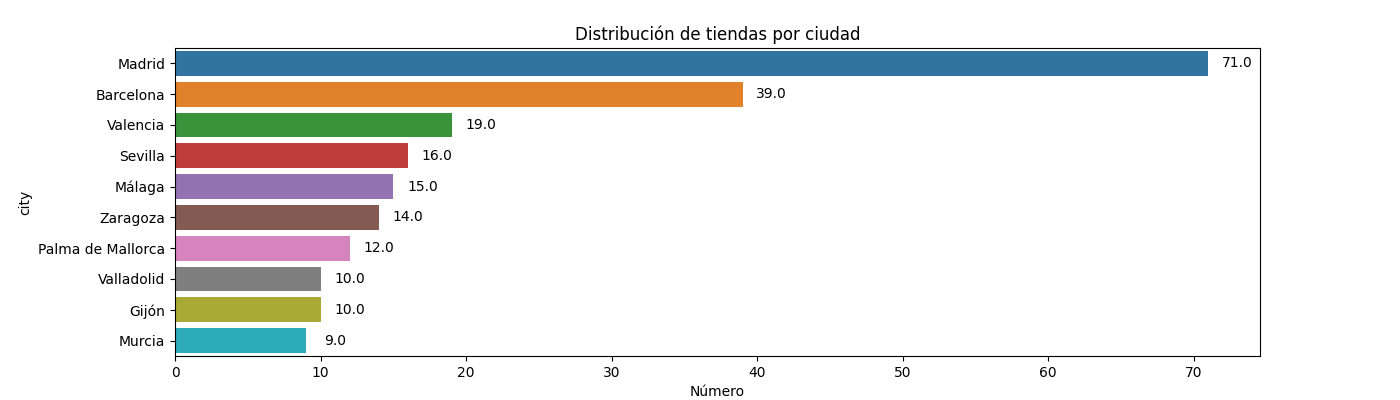

In [12]:
#Visualizamos
plt.clf()
plt.figure(figsize=(14,4))
splot = sns.barplot(y="city", x="count", data=pandas_df)
for p in splot.patches:
    splot.annotate(format(p.get_width(), '.1f'), 
                   (p.get_width()+2, p.get_y() + p.get_height()/2), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 0), 
                   textcoords = 'offset points')
# splot.set_xticklabels(splot.get_xticklabels(), rotation=70)
splot.set_title('Distribución de tiendas por ciudad')
plt.xlabel('Número')

%matplot plt